# **EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

!pip install category_encoders
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
smh = pd.read_csv("/content/drive/MyDrive/FinalYearProject/Student Mental health1.csv")
smh

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


# **Data Cleaning**

In [ ]:
#Irrelevant feature = Timestamp
smh.drop(columns=['Timestamp', 'What is your course?', 'Your current year of Study', 'Marital status', 'Did you seek any specialist for a treatment?'], inplace=True)

In [ ]:
#Rename columns
#method 1
#smh.columns = ['Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
#method 2
smh.rename(columns={'Choose your gender': 'Gender',
                   'What is your CGPA?': 'CGPA',
                  'Do you have Depression?': 'Depression',
                   'Do you have Anxiety?': 'Anxiety',
                  'Do you have Panic attack?': 'Panic_Attack'}, inplace=True)

smh.head()

,Gender,Age,CGPA,Depression,Anxiety,Panic_Attack
0,Female,18.0,3.00 - 3.49,Yes,No,Yes
1,Male,21.0,3.00 - 3.49,No,Yes,No
2,Male,19.0,3.00 - 3.49,Yes,Yes,Yes
3,Female,22.0,3.00 - 3.49,Yes,No,No
4,Male,23.0,3.00 - 3.49,No,No,No


In [ ]:
smh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        101 non-null    object 
 1   Age           100 non-null    float64
 2   CGPA          101 non-null    object 
 3   Depression    101 non-null    object 
 4   Anxiety       101 non-null    object 
 5   Panic_Attack  101 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB


In [ ]:
smh.isnull().sum()

Gender          0
Age             1
CGPA            0
Depression      0
Anxiety         0
Panic_Attack    0
dtype: int64

In [ ]:
print(smh.Age.value_counts())
print(smh['Age'].min())
print(smh['Age'].max())
smh['Age'].mean()

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64
18.0
24.0


20.53

In [ ]:
#Missing value - Mean imputation
smh['Age'].fillna(21, inplace=True)

In [ ]:
smh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        101 non-null    object 
 1   Age           101 non-null    float64
 2   CGPA          101 non-null    object 
 3   Depression    101 non-null    object 
 4   Anxiety       101 non-null    object 
 5   Panic_Attack  101 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB


In [ ]:
smh['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
smh.nunique()

Gender          2
Age             7
CGPA            6
Depression      2
Anxiety         2
Panic_Attack    2
dtype: int64

In [ ]:
smh['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [ ]:
# Remove trailing white space

#def remove_space(string):
    #string = string.strip()
    #return string
#smh["CGPA"] = smh["CGPA"].apply(remove_space)

smh["CGPA"] = smh["CGPA"].apply(lambda x: x.strip())

In [ ]:
smh['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

# **Analysis Data Visualization**

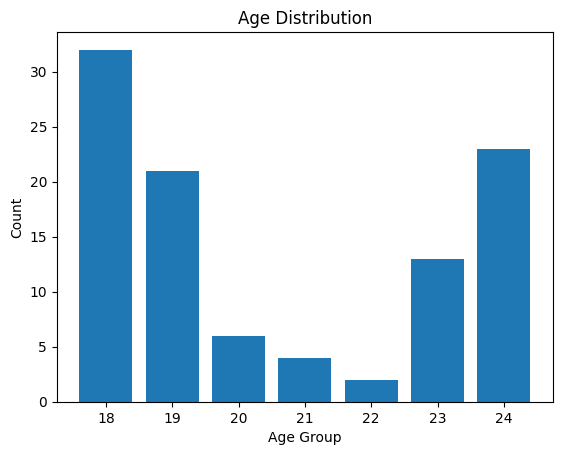

In [ ]:
age_distribution = smh['Age'].value_counts().reset_index()
age_distribution.columns = ['Age Group', 'Count']

# Create bar chart using plt
plt.bar(age_distribution['Age Group'], age_distribution['Count'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

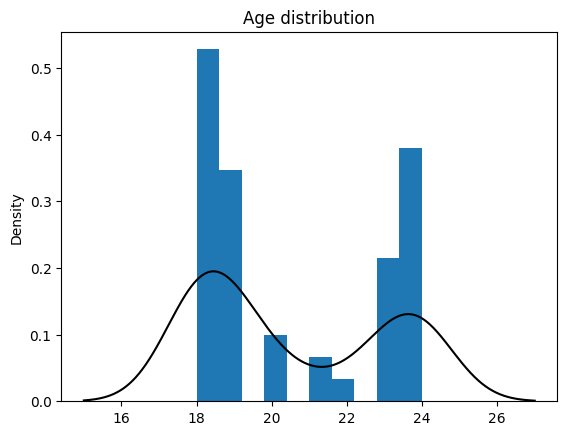

In [ ]:
plt.hist(smh['Age'], density=True)
plt.title("Age distribution")
smh["Age"].plot(kind='density', color='black')
plt.show()

There were more 18 years olds

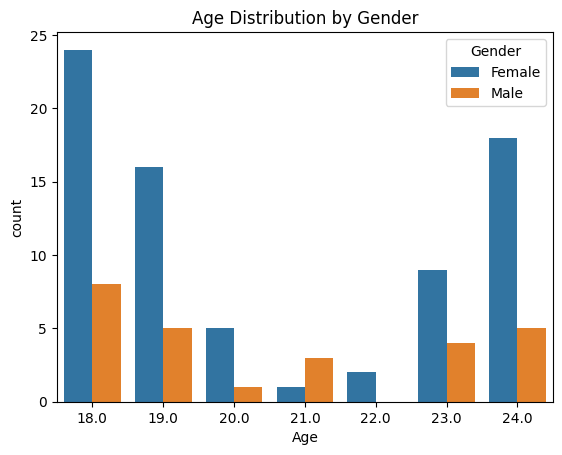

In [ ]:
sns.countplot(x=smh['Age'], hue=smh['Gender'])
plt.title("Age Distribution by Gender")
plt.show()

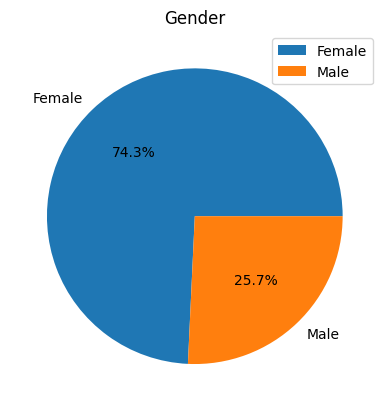

In [ ]:
plt.pie(smh['Gender'].value_counts(), labels=smh['Gender'].unique(), autopct='%1.1f%%')
plt.title("Gender")
plt.legend()
plt.show()

Dataset set consists of more females than males.

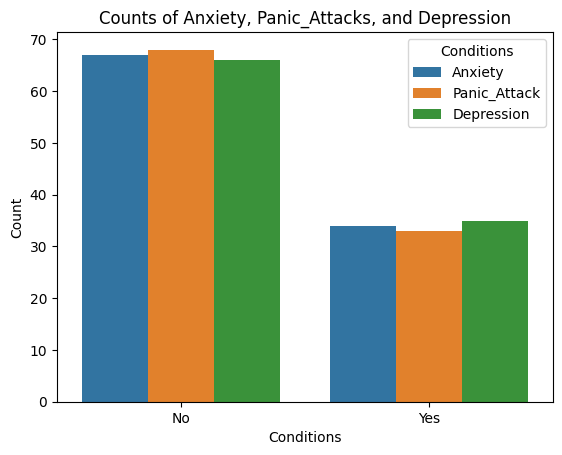

In [ ]:
Conditions = smh[['Anxiety', 'Panic_Attack', 'Depression']]

# Reshape the DataFrame using the melt function
melted_smh = Conditions.melt(var_name='Conditions', value_name='Response')

# Grouped bar chart
sns.countplot(data=melted_smh, x='Response', hue='Conditions')
plt.xlabel('Conditions')
plt.ylabel('Count')
plt.title('Counts of Anxiety, Panic_Attacks, and Depression')
plt.show()

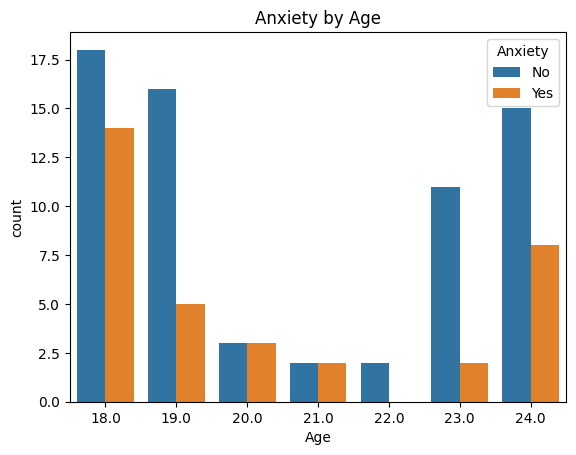

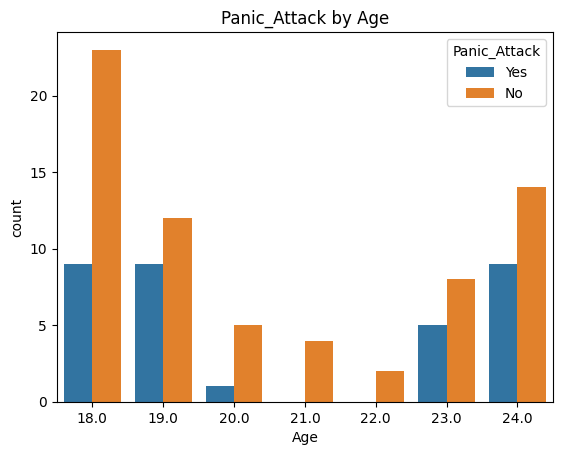

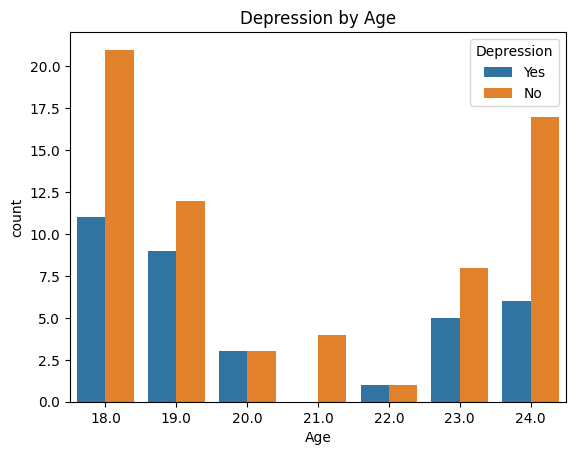

In [ ]:
Conditions = smh[['Anxiety', 'Panic_Attack', 'Depression']]

# Create separate count plots for each condition
for column in Conditions:
    sns.countplot(data=smh, x='Age', hue=Conditions[column])
    plt.title(f"{column} by Age")
    plt.show()

18 and 24 years old Students have one or more of the conditions. However, this may not be realistic as most repsondents are 18 and 24 years old students.

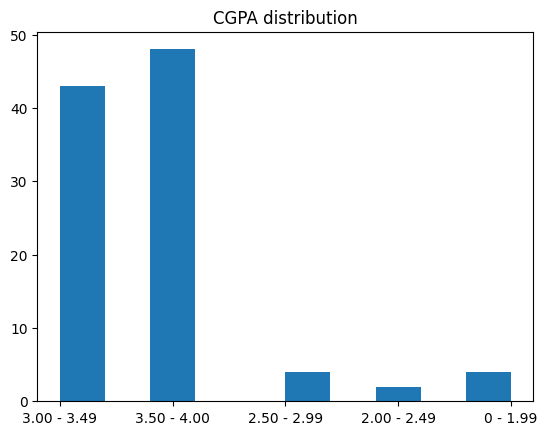

In [ ]:
plt.hist(smh['CGPA'])
plt.title("CGPA distribution")
plt.show()

Text(0.5, 1.0, 'CGPA Distribution by Gender')

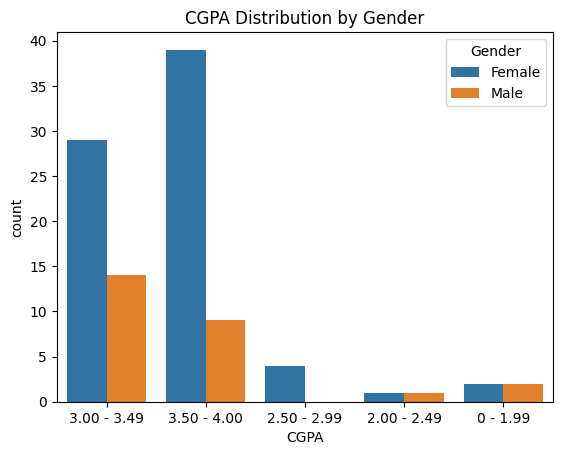

In [ ]:
sns.countplot(x=smh['CGPA'],hue=smh['Gender'])
plt.title("CGPA Distribution by Gender")

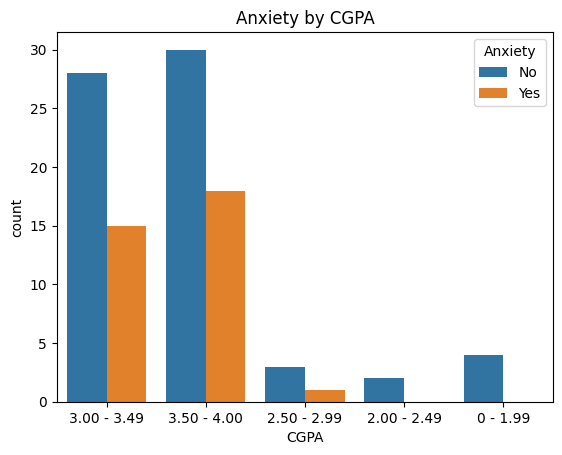

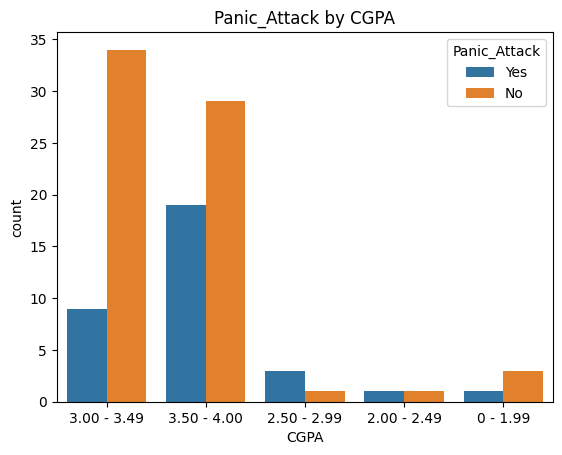

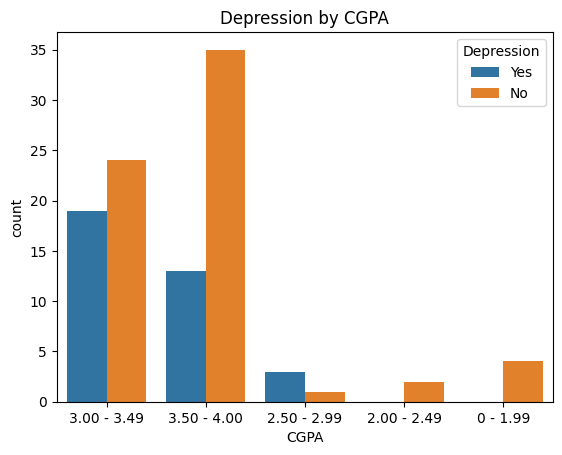

In [ ]:
Conditions = smh[['Anxiety', 'Panic_Attack', 'Depression']]

# Create separate count plots for each condition
for column in Conditions:
    sns.countplot(data=smh, x='CGPA', hue=Conditions[column])
    plt.title(f"{column} by CGPA")
    plt.show()

Students with higer CGPAs have one or more of the conditions

# **Data Preprocessing**

In [ ]:
smh['Age'] = smh['Age'].astype('int64')

In [ ]:
smh.dtypes

Gender          object
Age              int64
CGPA            object
Depression      object
Anxiety         object
Panic_Attack    object
dtype: object

**One-hot/Dummy Encoding**

In [ ]:
Categorical = ['Gender',	'Depression',	'Anxiety',	'Panic_Attack',	]

smh = pd.concat([smh, pd.get_dummies(smh[Categorical], drop_first=True, prefix=Categorical)], axis=1)
smh = smh.drop(Categorical, axis=1)

smh.head()

,Age,CGPA,Gender_Male,Depression_Yes,Anxiety_Yes,Panic_Attack_Yes
0,18,3.00 - 3.49,False,True,False,True
1,21,3.00 - 3.49,True,False,True,False
2,19,3.00 - 3.49,True,True,True,True
3,22,3.00 - 3.49,False,True,False,False
4,23,3.00 - 3.49,True,False,False,False


**Label Encoding**

In [ ]:
categorical_columns = ['CGPA']

le = LabelEncoder()

for column in categorical_columns:
    smh[column] = le.fit_transform(smh[column])

smh.head()

,Age,CGPA,Gender_Male,Depression_Yes,Anxiety_Yes,Panic_Attack_Yes
0,18,3,False,True,False,True
1,21,3,True,False,True,False
2,19,3,True,True,True,True
3,22,3,False,True,False,False
4,23,3,True,False,False,False


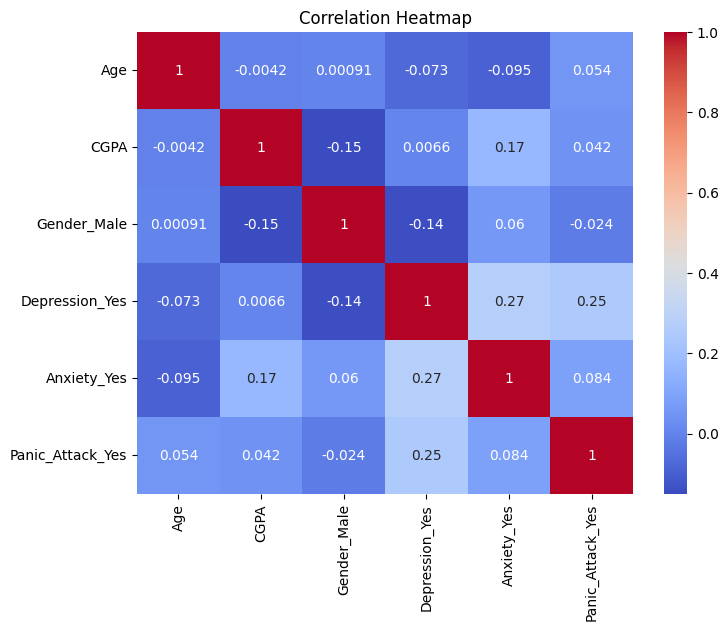

In [ ]:
correlation_matrix = smh.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**The correlation matrix above indicates that Anxiety may have the most significant impact on a student's CGPA**

# **Determine Feature Importance- Regression Models**

Ranking - Recursive Feature Elimination (RFE):

In [ ]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)
ranking = fit.ranking_

# Print the ranking for each feature
for feature, rank in zip(X.columns, ranking):
    print(f"Feature: {feature}, Rank: {rank}")

Feature: Age, Rank: 5
Feature: Gender_Male, Rank: 2
Feature: Depression_Yes, Rank: 3
Feature: Anxiety_Yes, Rank: 1
Feature: Panic_Attack_Yes, Rank: 4


Feature Importance - Tree-Based Models:

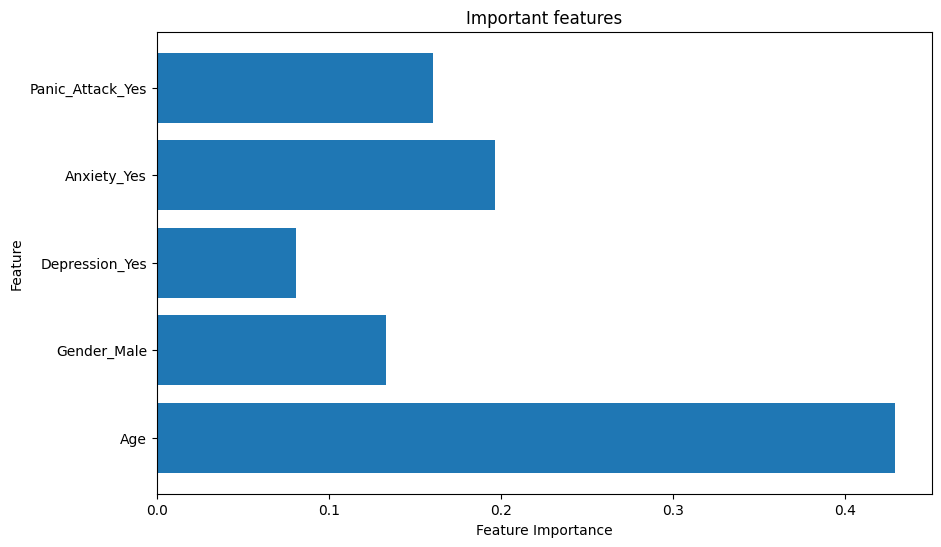

In [ ]:
#Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Important features')
plt.show()

**The ranking and feature importance scores above indicates that Anxiety is the specific mental health factor that has the most significant impact on a student's CGPA**

**Model Selection**

In [ ]:
X = smh.drop(['CGPA'], axis=1)
y = smh['CGPA']

In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implement Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)

# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=60)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=60, learning_rate=0.1)
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")

In [ ]:
evaluate_model(y_test, y_pred_linear_reg, "Linear Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Linear Regression - Mean Squared Error: 0.8849607469291458
Linear Regression - R-squared (R²): -0.17550508854142555

Decision Tree - Mean Squared Error: 1.4745349114035984
Decision Tree - R-squared (R²): -0.958644264846346

K-Nearest Neighbors (KNN) - Mean Squared Error: 1.0634920634920635
K-Nearest Neighbors (KNN) - R-squared (R²): -0.4126506024096386

Random Forest - Mean Squared Error: 1.2433481874702492
Random Forest - R-squared (R²): -0.6515558755252409

Gradient Boosting - Mean Squared Error: 1.5516920697503995
Gradient Boosting - R-squared (R²): -1.0611331408431512



Random Forest and K-Nearest Neighbors (KNN) are the best performing models